# the time independent shrodinger equation is given by
## $ -\frac{\hbar^2}{2m} \frac{d^2}{dx^2}\psi(x) + V(x) \psi(x) = E \psi(x) \cdots (i)$
# so we have to find the solution of the schrodinger equation using the finite difference method...
so according to the finite difference method we know that if $f(x)$ is a single valued function then the second order derivative of the function $f(x)$ is given by the following equation
## $f^{''}(x)=\frac{f(x+d)-2f(x)+f(x-d)}{d^2}$

Using the finite difference method, we can approximate the second-order derivative as:

## $$\psi^{''}(x_i)=\frac{\psi(x_{i+1})-2\psi(x_i)+\psi(x_{i-1})}{d^2}$$
so for $i=1 $
the schrodinger equation becomes 
## $$ -\frac{\hbar^2}{2m} \frac{d^2\psi(x_1)}{dx^2} + V(x) \psi(x_1) = E \psi(x_1)) \cdots (ii)$$
putting the value of $\psi(x_1)$ in equation $(ii)$ we get 
## $$  -\frac{\hbar^2}{2md^2}[\psi(x_2)-2\psi(x_1)+\psi(x_0)]+ V(x) \psi(x_1)=E \psi(x_1) \cdots(iii)$$
but according to boundary value condition $\psi(x_0)=0$
so simplifying the equation $(iii)$ we get
## $$ -\psi(x_2)+[2+\frac{2md^2  V(x_1) }{\hbar^2}]\psi(x_1)=\frac{2md^2E}{\hbar^2}\psi(x_1) \cdots(iv)$$
similarly for $i=2$
## $$ -\psi(x_1)+[2+\frac{2md^2  V(x_2)}{\hbar^2}]\psi(x_2)-\psi(x_3)=\frac{2md^2E}{\hbar^2}\psi(x_2) \cdots(v)$$
and for $i=3$
## $$  -\psi(x_2)+[2+\frac{2md^2  V(x_3)}{\hbar^2}]\psi(x_3)-\psi(x_4)=\frac{2md^2E}{\hbar^2}\psi(x_3) \cdots(vi)$$
## $$\vdots $$
for $i =n-1 $
## $$  -\psi(x_{n-2})+[2+\frac{2md^2  V(x_{n-1})}{\hbar^2}]\psi(x_{n-1})-\psi(x_{n})=\frac{2md^2E}{\hbar^2}\psi(x_{n-1}) \cdots(vii)$$
but according to boundary value condition $\psi(x_n)=0$
so the equation vii becomes 
## $$ -\psi(x_{n-2})+[2+\frac{2md^2  V(x_{n-1})}{\hbar^2}]\psi(x_{n-1})=\frac{2md^2E}{\hbar^2}\psi(x_{n-1}) \cdots(viii)$$
## so let us create a hamiltonian matrix 
$\left[ \begin{array}{cccc}
[2+\frac{2md^2V(x_1)}{\hbar^2}] & -1 & 0 & 0 & \ldots \\
-1 & [2+\frac{2md^2V(x_2)}{\hbar^2}] & -1 & 0 & \ldots \\
0 & -1 & \ddots & \ddots & \ddots \\
0 & 0 & \ddots & [2+\frac{2md^2V(x_{n-2})}{\hbar^2}] & -1 \\
0 & 0 & \ldots & -1 & [2+\frac{2md^2V(x_{n-1})}{\hbar^2}]  \\
\end{array} \right]_{(n+1) \times (n+1)}
%
\left[ \begin{array}{c}
\psi(x_1) \\
\psi(x_2) \\
\psi(x_3)\\
\vdots \\
\psi(x_{n-2})\\
\psi(x_{n-1})
\end{array} \right]
% 
=\frac{2md^2E}{\hbar^2}
\left[ \begin{array}{c}
\psi_1 \\
\psi_2 \\
\psi(x_3)\\
\vdots \\
\psi(x_{n-2})\\
\psi(x_{n-1})
\end{array} \right]$
## so entire matrix can be written as
## $$ H \psi =E\psi  $$ 

In [10]:
#now lets look at the code 
# solving the time independent schrodinger equation using numerical method 

import scienceplots

import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid", "dark_background"])
from scipy.sparse.linalg import eigsh
from scipy.sparse import diags


In [11]:

# Defining the constants
m = 0.511e6  # mass of electron in MeV/c^2 (converted from 0.511D6)
h = 1973     # value of Planck's constant in eV·Å

a = 10
n = 100
d = a / n
x = np.linspace(-a/2, a/2, n + 1)  # Adjusted to n + 1 points


In [12]:

# Define the harmonic oscillator potential
def V(x):
    return x**2


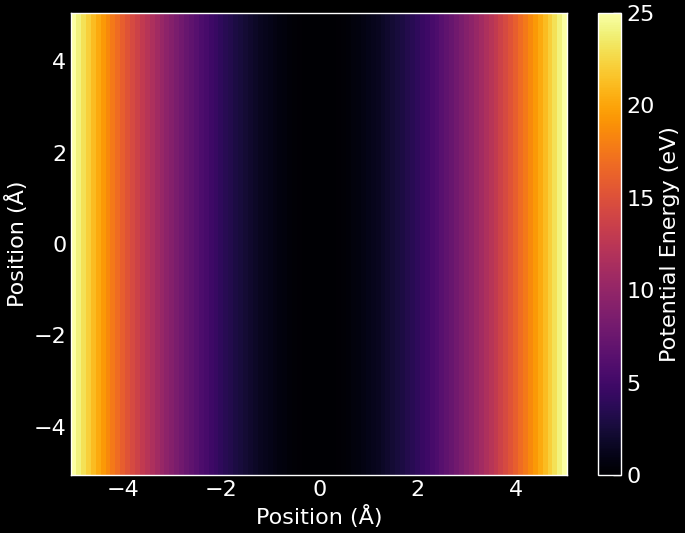

In [13]:

# Create a grid of X and Y coordinates
X, Y = np.meshgrid(x, x)

# Calculate the potential energy values at each point in the grid
potential_energy = V(X)

# Visualizing the potential
plt.pcolormesh(X, Y, potential_energy, cmap="inferno")
plt.colorbar(label='Potential Energy (eV)')  # Add a color scale with a label

# Set labels for the x and y axes
plt.xlabel('Position (Å)')
plt.ylabel('Position (Å)')

# Show the plot
plt.show()

In [25]:

# Create the diagonals of the sparse matrix H
diagonal = 2 * (1 + (m * d**2 / h**2) * V(x))
off_diagonal = -1 * np.ones(n)

# Create the sparse matrix H
H = diags([off_diagonal, diagonal, off_diagonal], [-1, 0, 1], shape=(n+1, n+1 ), format="csr")
H_dense = H.toarray()
# Set print options to display the matrix nicely
np.set_printoptions(precision=2, suppress=True, linewidth=120)
# Print the dense matrix

print("Matrix H:")
print(H_dense)
print(H.shape)

# Reset print options to default
np.set_printoptions()


Matrix H:
[[ 2.07 -1.    0.   ...  0.    0.    0.  ]
 [-1.    2.06 -1.   ...  0.    0.    0.  ]
 [ 0.   -1.    2.06 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  2.06 -1.    0.  ]
 [ 0.    0.    0.   ... -1.    2.06 -1.  ]
 [ 0.    0.    0.   ...  0.   -1.    2.07]]
(101, 101)


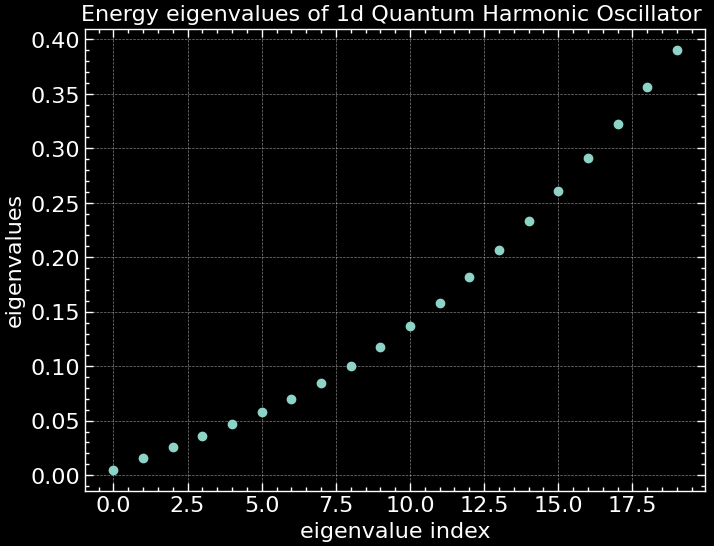

In [26]:

# Find eigenvalues and eigenvectors using eigsh
eigenvalues, eigenvectors = eigsh(H, k=20, which="SM")

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

plt.plot(eigenvalues,'o')
plt.title ('Energy eigenvalues of 1d Quantum Harmonic Oscillator ')
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalues')
plt.show()


In [16]:
eigenvalues

array([0.0051223 , 0.01536503, 0.02561572, 0.03594189, 0.04655334,
       0.05785243, 0.07032599, 0.08435571, 0.10014115, 0.11775033,
       0.13718953, 0.15844241, 0.18148532, 0.20629215, 0.23283572,
       0.26108793, 0.29101974, 0.32260105, 0.35580057, 0.3905858 ])

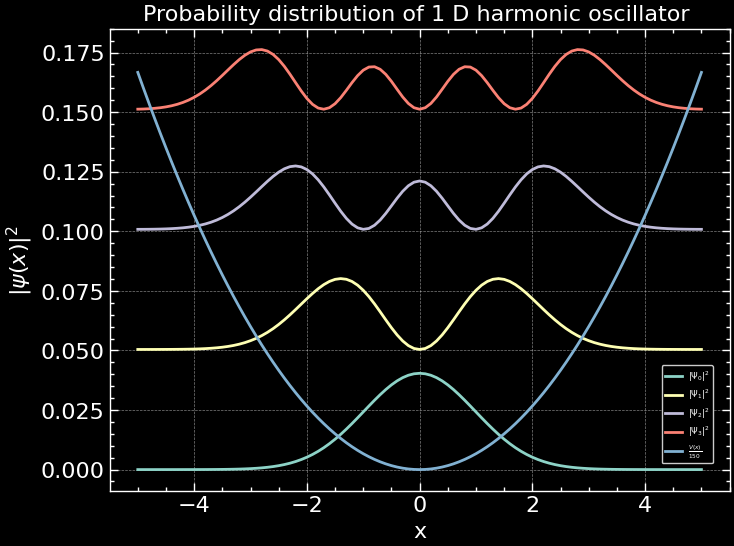

In [24]:

# Plot the squared magnitudes with offsets
z = max(np.abs(eigenvectors[:, 0])**2) + 0.01
for i in range(4):
    psi_squared = np.abs(eigenvectors[:, i])**2
    label = r'$|\Psi_' + str(i) + '|^2$'
    plt.plot(x, psi_squared + i * z, label=label)

# Plot the potential energy
plt.plot(x, V(x) / 150, label=r'$\frac{V(x)}{150}$')

plt.xlabel("x")
plt.ylabel(r"$|\psi (x) |^2$")
legend = plt.legend(loc='lower right', fontsize=6)
legend.set_bbox_to_anchor((0.98, 0.05))  # Adjust the position of the legend

plt.title('Probability distribution of 1 D harmonic oscillator ')
plt.show()